<a href="https://colab.research.google.com/github/zeynepnom/aygaz-bootcamp-project-zn/blob/main/Animals_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Aşağıda yer alan kodlar Kagglehub kullanarak "animals-with-attributes-2" veri setini başarıyla indirmenizi sağlıyor. Veri seti /root/.cache/kagglehub/datasets/rrebirrth/animals-with-attributes-2/versions/1 dizinine indirilmiş.

In [1]:
import kagglehub

# Veri setini indir
rrebirrth_animals_with_attributes_2_path = kagglehub.dataset_download('rrebirrth/animals-with-attributes-2')

# Veri setinin yolunu yazdır
print(f"Veri seti şu dizine indirildi: {rrebirrth_animals_with_attributes_2_path}")


Veri seti şu dizine indirildi: /root/.cache/kagglehub/datasets/rrebirrth/animals-with-attributes-2/versions/1


Veri setinin bulunduğu dizin başarıyla doğrulandı ve içeriğinde Animals_with_Attributes2 adlı bir klasör bulunduğu görüldü. Bu klasördeki dosyalar ve veri türleri daha detaylı incelenerek, model eğitimi için uygun veri hazırlığı yapılacak. Sonraki adımda, klasör içeriği analiz edilip, görsellerin veya veri dosyalarının formatları belirlenerek ekrana yazdırılmıştır.

In [2]:
import os

# İndirilen dizine gidip, oradaki dosyaların varlığını kontrol et
download_dir = rrebirrth_animals_with_attributes_2_path
print(f"Veri setinin bulunduğu dizin: {download_dir}")

# Dizinin içeriğini listeleyin
if os.path.exists(download_dir):
    print(f"Dosyalar: {os.listdir(download_dir)}")
else:
    print("Dizin bulunamadı.")


Veri setinin bulunduğu dizin: /root/.cache/kagglehub/datasets/rrebirrth/animals-with-attributes-2/versions/1
Dosyalar: ['Animals_with_Attributes2']


Seçilen 10 hayvan sınıfından 650'şer resim işlenip normalleştirildi.
Kalan resimler silindi ve işlem tamamlandı.
Veri seti, model eğitimi için hazır hale getirildi.

In [3]:
import os
import cv2
import numpy as np

rrebirrth_animals_with_attributes_2_path = '/root/.cache/kagglehub/datasets/rrebirrth/animals-with-attributes-2/versions/1/Animals_with_Attributes2'

# Kullanılacak 10 sınıf
target_classes = ['collie', 'dolphin', 'elephant', 'fox', 'moose', 'rabbit', 'sheep', 'squirrel', 'giant+panda', 'polar+bear']

# Çıkış dizini
output_dir = '/root/.cache/kagglehub/datasets/animals_for_classification/'

# Eğer çıkış dizini yoksa oluştur
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Resim boyutu (modelin giriş boyutuna göre)
image_size = (128, 128)  # Resimleri 128x128 boyutunda yapacağız

# Seçilen 10 sınıf için işlemi başlat
for animal in target_classes:
    # Hayvan sınıfının bulunduğu dizini tanımla
    animal_dir = os.path.join(rrebirrth_animals_with_attributes_2_path, 'JPEGImages', animal)

    # Eğer bu sınıfın dizini yoksa, geç
    if not os.path.exists(animal_dir):
        print(f"{animal} sınıfı dizini bulunamadı, atlanıyor.")
        continue

    # Yeni klasörü çıkış dizininde oluştur
    animal_output_dir = os.path.join(output_dir, animal)
    if not os.path.exists(animal_output_dir):
        os.makedirs(animal_output_dir)

    # Resim dosyalarının listesini al
    image_files = os.listdir(animal_dir)

    # İlk 650 resmi seç
    selected_images = image_files[:650]

    # Resimleri işle ve kopyala
    for image_file in selected_images:
        image_path = os.path.join(animal_dir, image_file)

        # Resmi oku
        img = cv2.imread(image_path)

        # Eğer resim yüklenemezse, geç
        if img is None:
            print(f"{image_file} yüklenemedi, atlanıyor.")
            continue

        # Resmi yeniden boyutlandır
        img_resized = cv2.resize(img, image_size)

        # Resmi normalize et (0-255 aralığından 0-1 aralığına)
        img_normalized = img_resized / 255.0

        # Normalize edilmiş resmi kaydet (0-255 aralığına tekrar döndürüp kaydediyoruz)
        output_image_path = os.path.join(animal_output_dir, image_file)
        cv2.imwrite(output_image_path, img_normalized * 255)  # Normalize edilmiş resmi kaydederken tekrar 0-255 aralığına döndürdük.

    # Kalan resimleri sil
    for image_file in image_files[650:]:
        image_path = os.path.join(animal_dir, image_file)
        os.remove(image_path)

    print(f"{animal} sınıfı için 650 resim kopyalandı ve diğerleri silindi.")

print("Veri seti hazır. Tüm resimler işlenip kopyalandı.")


collie sınıfı için 650 resim kopyalandı ve diğerleri silindi.
dolphin sınıfı için 650 resim kopyalandı ve diğerleri silindi.
elephant sınıfı için 650 resim kopyalandı ve diğerleri silindi.
fox sınıfı için 650 resim kopyalandı ve diğerleri silindi.
moose sınıfı için 650 resim kopyalandı ve diğerleri silindi.
rabbit sınıfı için 650 resim kopyalandı ve diğerleri silindi.
sheep sınıfı için 650 resim kopyalandı ve diğerleri silindi.
squirrel sınıfı için 650 resim kopyalandı ve diğerleri silindi.
giant+panda sınıfı için 650 resim kopyalandı ve diğerleri silindi.
polar+bear sınıfı için 650 resim kopyalandı ve diğerleri silindi.
Veri seti hazır. Tüm resimler işlenip kopyalandı.


10 farklı hayvan sınıfı için toplamda 6500 resim işlendi ve etiketlendi.
Resimler 128x128 boyutlarına getirildi, normalleştirildi ve uygun etiketlerle birlikte X ve y listelerine eklendi.
Veri seti, modelin eğitimine hazır hale geldi. Bu işlem, resimlerin ve etiketlerin bir araya getirildiği temel veri ön işleme sürecini oluşturur.

In [4]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Resimlerin bulunduğu çıkış dizini
output_dir = '/root/.cache/kagglehub/datasets/animals_for_classification/'

image_size = (128, 128)

# Veri setini yükle
# Resimleri ve etiketleri saklayacak listeler
X = []
y = []

# Her hayvan sınıfı için işlemi başlat
for idx, animal in enumerate(target_classes):
    animal_output_dir = os.path.join(output_dir, animal)

    # Hayvan sınıfındaki resimleri al
    image_files = os.listdir(animal_output_dir)

    for image_file in image_files:
        image_path = os.path.join(animal_output_dir, image_file)

        # Resmi oku
        img = cv2.imread(image_path)

        # Eğer resim yüklenemezse, geç
        if img is None:
            print(f"{image_file} yüklenemedi, atlanıyor.")
            continue

        # Resmi yeniden boyutlandır
        img_resized = cv2.resize(img, image_size)

        # Resmi normalize et (0-255 aralığından 0-1 aralığına)
        img_normalized = img_resized / 255.0

        # Resmi ve etiketini X ve y listelerine ekle
        X.append(img_normalized)
        y.append(idx)  # Etiket olarak sınıfın indeksini ekle (0-9 arası)

    print(f"{animal} sınıfı için resimler işlendi.")

# X ve y listelerini numpy array'e dönüştür
X = np.array(X)
y = np.array(y)

# Verinin boyutlarını yazdır
print(f"Görüntülerin boyutu: {X.shape}")
print(f"Etiketlerin boyutu: {y.shape}")


collie sınıfı için resimler işlendi.
dolphin sınıfı için resimler işlendi.
elephant sınıfı için resimler işlendi.
fox sınıfı için resimler işlendi.
moose sınıfı için resimler işlendi.
rabbit sınıfı için resimler işlendi.
sheep sınıfı için resimler işlendi.
squirrel sınıfı için resimler işlendi.
giant+panda sınıfı için resimler işlendi.
polar+bear sınıfı için resimler işlendi.
Görüntülerin boyutu: (6500, 128, 128, 3)
Etiketlerin boyutu: (6500,)


Veri seti %70 eğitim ve %30 test olacak şekilinde ayırdım.
Eğitim setinde 4550 resim, test setinde ise 1950 resim var.
Bu ayırma, modelin eğitim ve değerlendirilmesi için gerekli olan veriyi sağlamakta.

In [5]:
# Veriyi eğitim ve test setine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Eğitim ve test verilerinin boyutlarını yazdır
print(f"Eğitim verisi boyutu: {X_train.shape}")
print(f"Test verisi boyutu: {X_test.shape}")


Eğitim verisi boyutu: (4550, 128, 128, 3)
Test verisi boyutu: (1950, 128, 128, 3)


BU CNN modeli konvolüsyonel katmanlar ile resimlerden özellikleri çıkarır, ardından fully connected katmanlar ile bu özellikleri sınıflandırma için kullanır. Modelin yüksek sayıda parametreye sahip olması, daha güçlü öğrenme kapasitesine sahip olduğunu ancak eğitim için daha fazla veri ve hesaplama gücü gerektirebileceğini de gösterir.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

# Model
model = Sequential()

# İlk konvolüsyonel katman (L2 düzenlileştirme ile)
model.add(Conv2D(32, (3, 3), activation='relu',  input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))

# İkinci konvolüsyonel katman
model.add(Conv2D(64, (3, 3), activation='relu',))
model.add(MaxPooling2D((2, 2)))

# Üçüncü konvolüsyonel katman
model.add(Conv2D(128, (3, 3), activation='relu', ))
model.add(MaxPooling2D((2, 2)))

# Düzleştirme ve fully connected katmanlar
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.6))

model.add(Dense(10, activation='softmax'))  # Çıkış katmanı

# Derleme
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model özeti
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,943,946 (49.38 MB)

 Trainable params: 12,943,946 (49.38 MB)

 Non-trainable params: 0 (0.00 B)

Eğitim Sonuçlarım: Model, eğitim sırasında doğruluğunu her epoch'ta artırarak %60.52'ye kadar ulaştı.
Doğrulama Sonuçları: Doğrulama doğruluğu da sürekli bir iyileşme göstererek %59.18'e ulaştı.
Kaybın Azalması: Modelin kaybı da (loss) zamanla azalmış, bu da modelin daha iyi öğrenmeye başladığını gösteriyor.
Bu eğitimin sonucu, modelin doğru sınıflandırma yapma kapasitesinin arttığını ve daha fazla eğitim ile doğrulama doğruluğunun daha da iyileşebileceğini gösteriyor.

In [7]:

# Modeli eğit
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))




Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.2049 - loss: 4.2441 - val_accuracy: 0.3667 - val_loss: 2.1561
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 253s 1s/step - accuracy: 0.3838 - loss: 2.0768 - val_accuracy: 0.4174 - val_loss: 2.0111
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - accuracy: 0.4138 - loss: 2.0318 - val_accuracy: 0.4867 - val_loss: 1.9299
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.4691 - loss: 1.9653 - val_accuracy: 0.4841 - val_loss: 1.8855
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - accuracy: 0.4818 - loss: 1.9444 - val_accuracy: 0.5544 - val_loss: 1.7907
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 260s 1s/step - accuracy: 0.5227 - loss: 1.8103 - val_accuracy: 0.5518 - val_loss: 1.7366
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.5545 - loss: 1.7971 - val_accuracy: 0.5672 - val_loss: 1.7391
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.5506 - loss: 1.7908 - val_accu

Modelin bazı sınıflarda (örneğin, dolphin ve giant+panda) oldukça iyi performans gösterdiği görülüyor. Ancak, bazı sınıflarda (örneğin, fox ve squirrel) düşük sonuçlar alınıyor. Bu, modelin bazı hayvan türlerini diğerlerine göre daha zor sınıflandırdığını ve veri setindeki dengesizliklerin etkili olabileceğini gösteriyor.

Bu tür düşük performanslar için daha fazla veri, modelde iyileştirmeler veya veri augmentasyonu gibi adımlar atılabilir.

In [8]:
import numpy as np
from sklearn.metrics import classification_report

# Test Verileri ile Modeli Değerlendir
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Tahminler Yap ve Sınıf Bazlı Performans Raporu
y_pred = np.argmax(model.predict(X_test), axis=1)
print("Classification Report:")
print(classification_report(y_test, y_pred))


61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 337ms/step - accuracy: 0.5764 - loss: 1.8488
Test Loss: 1.8411439657211304
Test Accuracy: 0.5917948484420776
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 337ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.40      0.51       218
           1       0.89      0.85      0.87       190
           2       0.72      0.62      0.67       202
           3       0.52      0.33      0.40       178
           4       0.45      0.39      0.42       191
           5       0.47      0.54      0.50       202
           6       0.60      0.67      0.63       189
           7       0.31      0.51      0.39       189
           8       0.85      0.82      0.84       195
           9       0.61      0.79      0.69       196

    accuracy                           0.59      1950
   macro avg       0.61      0.59      0.59      1950
weighted avg       0.62      0.59      0.59      1950



Bu kod, test setinden rastgele seçilen resminlerin model tarafından nasıl sınıflandırıldığını görselleştirir. Her görsel için gerçek ve tahmin edilen etiketler karşılaştırılır ve görseller gösterilir. Bu işlem, modelin tahmin doğruluğunu görsel olarak incelemeyi sağlar.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


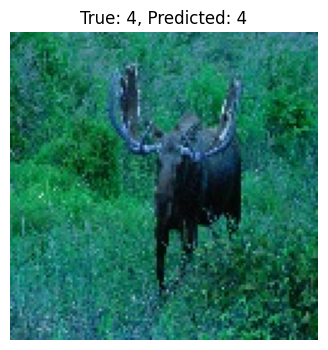

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


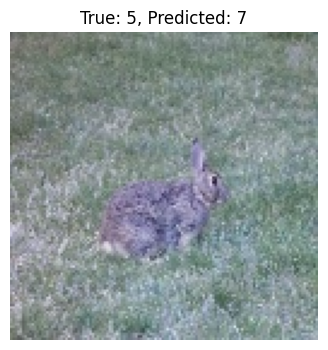

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


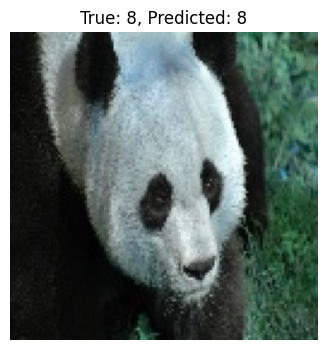

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


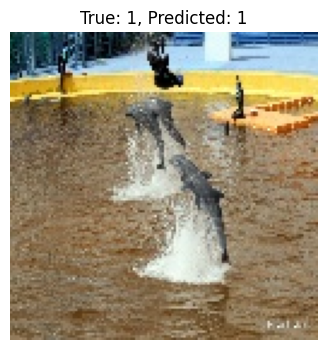

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


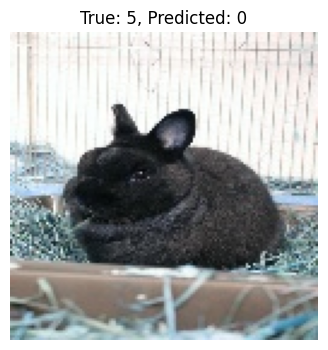

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing import image

# Test verisinden rastgele birkaç resim seç
num_images_to_show = 5
random_indices = random.sample(range(len(X_test)), num_images_to_show)

# Görselleştirmek için her resim için tahmin yap
for i in random_indices:
    img = X_test[i]  # Rastgele seçilen test görseli
    true_label = y_test[i]  # Gerçek etiket

    # Modelin tahminini yap
    pred = model.predict(np.expand_dims(img, axis=0))  # Resmi modele ver
    predicted_label = np.argmax(pred)  # Tahmin edilen sınıf

    # Resmi göster
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()


Bu kod, test setindeki resimleri iki şekilde manipüle eder: birincisi parlaklık artırma, ikincisi karartma. Manipüle edilmiş görüntülerle model değerlendirilir. Sonuç olarak, modelin manipüle edilmiş test seti üzerindeki doğruluğu düşük çıkmıştır (%10.56 doğruluk). Bu, modelin parlaklık değişikliklerine karşı hassas olduğunu veya daha fazla eğitim verisine ihtiyaç duyduğunu gösterebilir.

In [10]:
import numpy as np
import cv2

# Manipülasyon fonksiyonu
def get_manipulated_images(images):
    manipulated_images = []
    for img in images:
        # Parlaklık artırma
        bright_img = cv2.convertScaleAbs(img, alpha=1.2, beta=50)
        # Parlaklık azaltma
        dark_img = cv2.convertScaleAbs(img, alpha=0.8, beta=-50)
        # Manipülasyonları birleştir
        manipulated_images.extend([bright_img, dark_img])
    return np.array(manipulated_images)

# Test setini manipüle et
manipulated_test_data = get_manipulated_images((X_test * 255).astype(np.uint8)) / 255.0  # Normalizasyon

# Manipüle edilmiş test setine uygun etiketler oluştur
manipulated_y_test = np.tile(y_test, 2)  # 2 manipülasyon türü olduğundan etiketler iki kez tekrar eder

# Manipüle edilmiş test seti ile modeli değerlendir
test_loss, test_accuracy = model.evaluate(manipulated_test_data, manipulated_y_test, verbose=1)
print(f"Manipüle edilmiş test seti Loss: {test_loss}")
print(f"Manipüle edilmiş test seti Accuracy: {test_accuracy}")


122/122 ━━━━━━━━━━━━━━━━━━━━ 43s 352ms/step - accuracy: 0.1051 - loss: 4.0042
Manipüle edilmiş test seti Loss: 3.9576876163482666
Manipüle edilmiş test seti Accuracy: 0.10564102232456207


Bu kod bloğu, manipüle edilmiş test setinden rastgele 5 görsel seçer ve modelin bu görseller üzerindeki tahminlerini gösterir. Her görsel için, modelin doğru etiket ve tahmin ettiği etiketle birlikte görseli görselleştirir. Böylece modelin, görsellerdeki manipülasyonlara (parlaklık artırma veya azaltma gibi) nasıl tepki verdiği görsel olarak analiz edilebilir.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


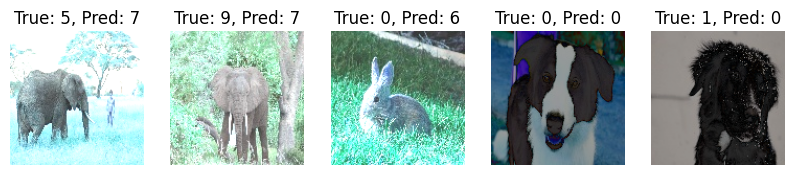

In [12]:
# Yeni kod bloğu: Manipüle edilmiş test setinden rastgele birkaç görseli göster ve model tahmini yap
import matplotlib.pyplot as plt

def display_random_manipulated_images_and_predictions(images, labels, model, num_samples=5):
    # Num_samples kadar örneği rastgele seç
    random_indices = np.random.choice(len(images), num_samples, replace=False)

    plt.figure(figsize=(10, 5))
    for i, idx in enumerate(random_indices):
        image = images[idx]
        label = labels[idx]

        # Model tahmini
        pred = model.predict(np.expand_dims(image, axis=0))  # Modelin tahmini için batche eklemek gerekiyor
        predicted_label = np.argmax(pred, axis=1)[0]  # En yüksek olasılığı taşıyan sınıf

        # Görseli ve tahmini yazdır
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image)
        plt.title(f"True: {label}, Pred: {predicted_label}")
        plt.axis('off')

    plt.show()

# Manipüle edilmiş test verilerinden rastgele 5 örnekle tahmin yapma
display_random_manipulated_images_and_predictions(manipulated_test_data, manipulated_y_test, model, num_samples=5)



1. **Gray World Algoritması**: Görsellerin renk dengesini düzeltmek için her kanaldaki (kırmızı, yeşil, mavi) ortalama değerler hesaplanır ve her bir kanal bu ortalamaya göre ayarlanır.
2. **Batch İşleme**: Görseller küçük parçalar (batch'ler) halinde işlenir, böylece bellek yönetimi sağlanır.
3. **Model Değerlendirmesi**: Renk sabitliği uygulanmış verilerle modelin performansı test edilir.

Sonuç olarak:
- **Test Loss**: 3.6888
- **Test Accuracy**: 0.1067

Bu sonuçlar, modelin renk sabitliği uygulandıktan sonra hala düşük bir doğruluk sergilediğini gösteriyor. Bu, renk düzeltmenin modelin genel doğruluğu üzerinde belirgin bir iyileştirme sağlamadığını gösteriyor olabilir.

In [11]:
import numpy as np
import cv2
import gc

# Gray World algoritması ile renk sabitliği
def apply_gray_world(image):
    mean_b, mean_g, mean_r = np.mean(image[:, :, 0]), np.mean(image[:, :, 1]), np.mean(image[:, :, 2])
    mean_gray = (mean_b + mean_g + mean_r) / 3
    image[:, :, 0] = np.clip(image[:, :, 0] * (mean_gray / mean_b), 0, 255)
    image[:, :, 1] = np.clip(image[:, :, 1] * (mean_gray / mean_g), 0, 255)
    image[:, :, 2] = np.clip(image[:, :, 2] * (mean_gray / mean_r), 0, 255)
    return image

# Renk sabitliği algoritmasını manipüle edilmiş verilere uygulama
def apply_color_correction_on_batch(images):
    corrected_images = []
    for img in images:
        corrected_img = apply_gray_world((img * 255).astype(np.uint8))  # Görüntüyü 0-255 aralığına dönüştür
        corrected_images.append(corrected_img / 255.0)  # Normalize et
    return np.array(corrected_images)

# Küçük batch'lerle renk sabitliği uygulama
def process_in_batches(images, batch_size=32):
    num_batches = len(images) // batch_size
    processed_images = []

    for i in range(num_batches + 1):
        batch = images[i * batch_size : (i + 1) * batch_size]
        processed_batch = apply_color_correction_on_batch(batch)
        processed_images.extend(processed_batch)

        # Bellek yönetimi
        del batch
        gc.collect()

    return np.array(processed_images)

# Küçük batch'lerle modeli değerlendirme
def evaluate_in_batches(model, images, labels, batch_size=32):
    num_batches = len(images) // batch_size
    total_loss = 0
    total_accuracy = 0

    for i in range(num_batches + 1):
        batch_images = images[i * batch_size : (i + 1) * batch_size]
        batch_labels = labels[i * batch_size : (i + 1) * batch_size]

        loss, accuracy = model.evaluate(batch_images, batch_labels, verbose=0)
        total_loss += loss
        total_accuracy += accuracy

        # Bellek yönetimi
        del batch_images, batch_labels
        gc.collect()

    avg_loss = total_loss / (num_batches + 1)
    avg_accuracy = total_accuracy / (num_batches + 1)

    return avg_loss, avg_accuracy

# Manipüle edilmiş test verilerine renk sabitliği uygulama
wb_test_data = process_in_batches(manipulated_test_data, batch_size=32)

# Manipüle edilmiş ve renk sabitliği uygulanmış test seti ile modeli değerlendir
test_loss, test_accuracy = evaluate_in_batches(model, wb_test_data, manipulated_y_test, batch_size=32)

# Sonuçları yazdırma
print(f"Renk sabitliği uygulanmış ve manipüle edilmiş test seti Loss: {test_loss}")
print(f"Renk sabitliği uygulanmış ve manipüle edilmiş test seti Accuracy: {test_accuracy}")


Renk sabitliği uygulanmış ve manipüle edilmiş test seti Loss: 3.688804569791575
Renk sabitliği uygulanmış ve manipüle edilmiş test seti Accuracy: 0.10666715457546906


Burada manipüle edilmiş ve renk sabitliği uygulanmış test verilerinden rastgele birkaç örnek seçip, bu görsellerin model tarafından nasıl sınıflandırıldığını görselleştirmektedir. Her bir görselin başlığında gerçek etiket (True) ve modelin tahmin ettiği etiket (Pred) gösterilmektedir. Bu işlem, renk sabitliği uygulandıktan sonra modelin performansını değerlendirmek ve modelin manipüle edilmiş verilerdeki doğruluğunu görsel olarak analiz etmek amacıyla yapılmıştır.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


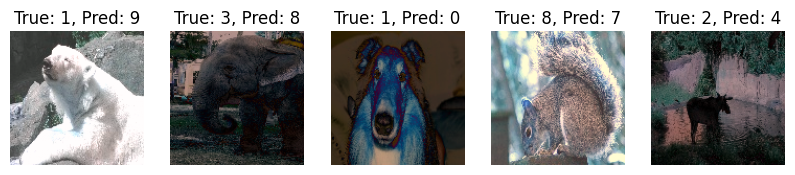

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Manipüle edilmiş ve renk sabitliği uygulanmış test verilerinden rastgele birkaç görseli göster ve model tahmini yap
def display_random_manipulated_images_and_predictions(images, labels, model, num_samples=5):
    # Num_samples kadar örneği rastgele seç
    random_indices = np.random.choice(len(images), num_samples, replace=False)

    plt.figure(figsize=(10, 5))
    for i, idx in enumerate(random_indices):
        image = images[idx]
        label = labels[idx]

        # Model tahmini
        pred = model.predict(np.expand_dims(image, axis=0))  # Modelin tahmini için batche eklemek gerekiyor
        predicted_label = np.argmax(pred, axis=1)[0]  # En yüksek olasılığı taşıyan sınıf

        # Görseli ve tahmini yazdır
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image)
        plt.title(f"True: {label}, Pred: {predicted_label}")
        plt.axis('off')

    plt.show()

# Bu bloğu, ana koddan bağımsız bir şekilde çalıştırabilirsiniz
# Manipüle edilmiş ve renk sabitliği uygulanmış test verilerinden rastgele 5 örnekle tahmin yapma
display_random_manipulated_images_and_predictions(wb_test_data, manipulated_y_test, model, num_samples=5)
